In [1]:
%run ./01_data_prep.ipynb
%run ./utils.ipynb

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from autosklearn.classification import AutoSklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
# The models we used
ns_probs = [0 for _ in range(len(y_valid))] # no skill probability generation
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs=-1).fit(X_train, y_train)
knn_pred = knn.predict_proba(X_valid)[:, 1]
dt = DecisionTreeClassifier(max_depth = 13).fit(X_train, y_train)
dt_pred = dt.predict_proba(X_valid)[:, 1]



In [4]:
svm = make_pipeline(StandardScaler(), SVC(gamma=0.03, C=0.8, probability=True, )).fit(X_train, y_train)
svm_pred = svm.predict_proba(X_valid)[:, 1]



In [5]:
nn = MLPClassifier(alpha=0.001, learning_rate_init=0.005).fit(X_train, y_train)
nn_pred = nn.predict_proba(X_valid)[:, 1]



In [6]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(loss="log")).fit(X_train, y_train)
sgd_pred = sgd.predict_proba(X_valid)[:, 1]


In [7]:
rf = RandomForestClassifier(bootstrap=True, max_depth=50, max_features=10, n_estimators=200, n_jobs=-1).fit(X_train, y_train)
rf_pred = rf.predict_proba(X_valid)[:, 1]

In [8]:
automl = AutoSklearnClassifier(n_jobs=-1).fit(X_train, y_train)


In [9]:
auto_pred = automl.predict_proba(X_valid)[:, 1]

In [18]:
from sklearn.ensemble import VotingClassifier

classifier = VotingClassifier(
    estimators=[
        ('knn', knn), ('dt', dt), ('svc', svm),
        ('mlp', nn), ('sgd', sgd), ('rf', rf)
    ],
    voting='soft',
    n_jobs=-1
)

classifier = classifier.fit(X_train, y_train)
vote_pred = classifier.predict_proba(X_valid)[:, 1]


In [19]:
ns_auc = roc_auc_score(y_valid, ns_probs)
knn_auc = roc_auc_score(y_valid, knn_pred)
dt_auc = roc_auc_score(y_valid, dt_pred)
svm_auc = roc_auc_score(y_valid, svm_pred)
nn_auc = roc_auc_score(y_valid, nn_pred)
sgd_auc = roc_auc_score(y_valid, sgd_pred)
rf_auc = roc_auc_score(y_valid, rf_pred)
auto_auc = roc_auc_score(y_valid, auto_pred)

In [20]:
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_valid, knn_pred)
dt_fpr, dt_tpr, _ = roc_curve(y_valid, dt_pred)
svm_fpr, svm_tpr, _ = roc_curve(y_valid, svm_pred)
nn_fpr, nn_tpr, _ = roc_curve(y_valid, nn_pred)
sgd_fpr, sgd_tpr, _ = roc_curve(y_valid, sgd_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_valid, rf_pred)
auto_fpr, auto_tpr, _ = roc_curve(y_valid, auto_pred)


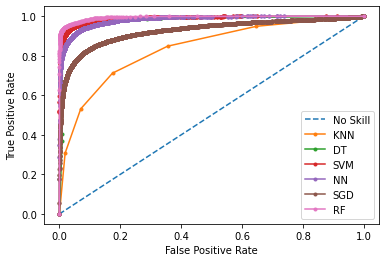

In [21]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT')
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM')
plt.plot(nn_fpr, nn_tpr, marker='.', label='NN')
plt.plot(sgd_fpr, sgd_tpr, marker='.', label='SGD')
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("AUC.png")

In [22]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('DT: ROC AUC=%.3f' % (dt_auc))
print('SVM: ROC AUC=%.3f' % (svm_auc))
print('NN: ROC AUC=%.3f' % (nn_auc))
print('SGD: ROC AUC=%.3f' % (sgd_auc))
print('RF: ROC AUC=%.3f' % (rf_auc))

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.837
DT: ROC AUC=0.980
SVM: ROC AUC=0.988
NN: ROC AUC=0.983
SGD: ROC AUC=0.927
RF: ROC AUC=0.995


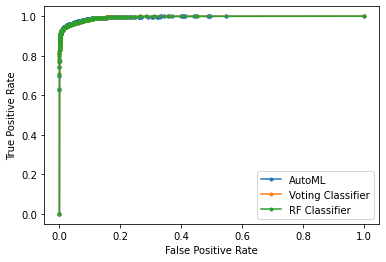

In [25]:
vote_fpr, vote_tpr, _ = roc_curve(y_valid, rf_pred)
auto_fpr, auto_tpr, _ = roc_curve(y_valid, auto_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_valid, rf_pred)

vote_auc = roc_auc_score(y_valid, vote_pred)
auto_auc = roc_auc_score(y_valid, auto_pred)

plt.plot(auto_fpr, auto_tpr, marker='.', label='AutoML')
plt.plot(vote_fpr, vote_tpr, marker='.', label='Voting Classifier')
plt.plot(rf_fpr, vote_tpr, marker='.', label='RF Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig("AUC_automl.png")

In [26]:
print('Voting Classifier: ROC AUC=%.3f' % (vote_auc))
print('AutoML: ROC AUC=%.3f' % (auto_auc))
print('RF: ROC AUC=%.3f' % (rf_auc))
# Vote AUC = 0.995
# AutoML AUC = 0.995
# RF_AUC=0.995

Voting Classifier: ROC AUC=0.990
AutoML: ROC AUC=0.995
RF: ROC AUC=0.995
